In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('20_Hierarchical_Clustering_dataset.csv')

In [3]:
print(dataset.shape)
print(dataset.head(5))
print(dataset.describe())

(200, 5)
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score
0           1    Male   19                  15              39
1           2    Male   21                  15              81
2           3  Female   20                  16               6
3           4  Female   23                  16              77
4           5  Female   31                  17              40
       CustomerID         Age  Annual Income (k$)  Spending Score
count  200.000000  200.000000          200.000000      200.000000
mean   100.500000   38.850000           60.560000       50.200000
std     57.879185   13.969007           26.264721       25.823522
min      1.000000   18.000000           15.000000        1.000000
25%     50.750000   28.750000           41.500000       34.750000
50%    100.500000   36.000000           61.500000       50.000000
75%    150.250000   49.000000           78.000000       73.000000
max    200.000000   70.000000          137.000000       99.000000


In [4]:
'''LABEL ENCODING'''
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
dataset['Gender']=label_encoder.fit_transform(dataset['Gender'])
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


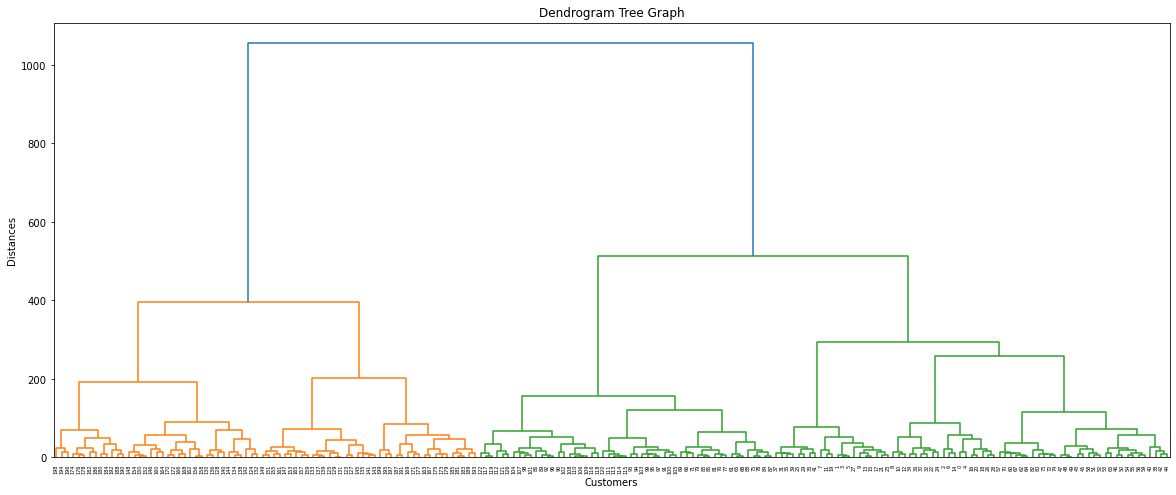

In [5]:
'''DENDROGRAM DATA VISUALIZATION'''
import scipy.cluster.hierarchy as clus

plt.figure(1,figsize=(20,8))
dendrogram=clus.dendrogram(clus.linkage(dataset,method='ward'))

plt.title('Dendrogram Tree Graph')
plt.xlabel('Customers')
plt.ylabel('Distances')
plt.show()

In [6]:
'''FITTINHG HIERARCHICAL CLUSTERING TO THE DATASET WITH n=5'''
#Agglomerative Cluster-sequentially merging similar clusters
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=7,affinity='euclidean',linkage='average',compute_full_tree='auto')
y_means=model.fit_predict(dataset)
y_means


array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 5, 6, 0, 6, 5, 6, 5, 6,
       5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6,
       5, 6, 5, 6, 5, 6, 5, 6, 5, 2, 3, 6, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int64)

'''VISUALIZING THE NUMBER OF CLUSTER n=6'''

Cluster 1:Customer with medium income and medium spending
Cluster 2:Customer with high income and high spending
Cluster 3:Customer with low income and low spending   
Cluster 4:Customer with high income and low spending    
Cluster 5:Customer with low income and high spending  
cluster 6:Customer with medium income and low spending
cluster 7:Customer with medium income and high spending

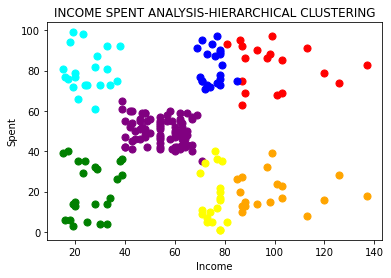

In [7]:
x=dataset.iloc[:,[3,4]].values
plt.scatter(x[y_means==0,0],x[y_means==0,1],s=50,c='purple',label='Cluster 1')
plt.scatter(x[y_means==1,0],x[y_means==1,1],s=50,c='green',label='Cluster 2')
plt.scatter(x[y_means==2,0],x[y_means==2,1],s=50,c='red',label='Cluster 3')
plt.scatter(x[y_means==3,0],x[y_means==3,1],s=50,c='orange',label='Cluster 4')
plt.scatter(x[y_means==4,0],x[y_means==4,1],s=50,c='cyan',label='Cluster 5')
plt.scatter(x[y_means==5,0],x[y_means==5,1],s=50,c='yellow',label='Cluster 6')
plt.scatter(x[y_means==6,0],x[y_means==6,1],s=50,c='Blue',label='Cluster 7')

plt.title('INCOME SPENT ANALYSIS-HIERARCHICAL CLUSTERING')

plt.xlabel('Income')
plt.ylabel('Spent')
plt.show()